Tutorial: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [1]:
import time
import sys
import numpy as np

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [53]:
embedding_dim = 384
vec = np.fromfile('../data/computed_embeddings/realnewslike/c4-train.00000-of-00512.data', dtype='float32')
vec = vec.reshape(-1, embedding_dim)

In [4]:
vec_subset = vec[:10000]

# Correlation Matrix

http://www.psychology.emory.edu/clinical/bliwise/Tutorials/SCATTER/scatterplots/effect.htm#:~:text=A%20correlation%20coefficient%20of%20.,a%20strong%20or%20large%20correlation

Correlation size scale:

.10 Small

.30 Moderate

.50 Large

In [120]:
df = pd.DataFrame(data=vec_subset)

<AxesSubplot:>

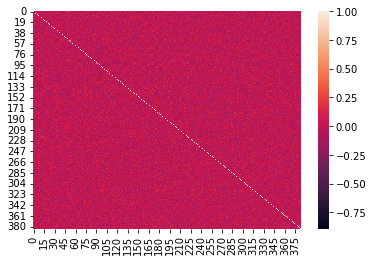

In [121]:
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = False)

In [122]:
correlation_mat

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,1.000000,-0.046583,0.078479,0.066715,0.067070,-0.010978,-0.124289,-0.050255,-0.069505,0.077476,...,0.056073,-0.036252,-0.032710,-0.010702,-0.022854,-0.062781,-0.039887,-0.008871,-0.051597,0.022290
1,-0.046583,1.000000,-0.010966,0.074494,0.077027,0.005903,0.192880,0.040805,-0.036528,0.080899,...,0.014109,-0.080399,0.086841,-0.001941,-0.042241,-0.076652,0.106744,0.128564,-0.046929,-0.100430
2,0.078479,-0.010966,1.000000,0.072443,0.112954,-0.151709,-0.086193,-0.122612,-0.076655,-0.046934,...,0.066532,-0.020011,0.004770,0.009523,-0.041429,0.018947,-0.048220,-0.007406,-0.082102,0.065093
3,0.066715,0.074494,0.072443,1.000000,0.065082,-0.053412,-0.040116,-0.019736,-0.104925,-0.070042,...,-0.124744,-0.059807,-0.012762,-0.022767,-0.043906,0.000053,-0.051610,-0.026622,-0.105185,0.000513
4,0.067070,0.077027,0.112954,0.065082,1.000000,0.002903,0.027676,-0.014954,0.018340,0.073599,...,0.080512,-0.002453,0.017615,-0.013266,-0.040268,-0.008918,0.018430,0.010578,0.017844,0.100112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-0.062781,-0.076652,0.018947,0.000053,-0.008918,-0.108119,-0.055814,-0.069633,-0.038902,-0.034854,...,0.083857,0.026314,0.071458,-0.033568,0.056754,1.000000,0.015159,-0.001796,-0.018572,0.026714
380,-0.039887,0.106744,-0.048220,-0.051610,0.018430,-0.038508,0.035813,-0.086790,0.031023,0.015906,...,0.034116,0.047453,0.066257,0.093403,-0.056201,0.015159,1.000000,0.038389,0.019391,-0.021135
381,-0.008871,0.128564,-0.007406,-0.026622,0.010578,0.033865,0.203606,-0.050466,-0.005719,-0.154748,...,0.026995,0.011219,0.087678,-0.025302,0.118512,-0.001796,0.038389,1.000000,-0.003660,-0.156029
382,-0.051597,-0.046929,-0.082102,-0.105185,0.017844,0.037978,-0.022616,0.000725,0.029304,-0.034460,...,0.007508,-0.001705,0.062613,0.010096,-0.035878,-0.018572,0.019391,-0.003660,1.000000,-0.028703


In [134]:
np.array(correlation_mat[0])[np.r_[0:5,8:10]]

array([ 1.        , -0.04658346,  0.07847862,  0.06671478,  0.06707008,
       -0.06950462,  0.07747564])

In [133]:
np.r_[0:5,8:10]

array([0, 1, 2, 3, 4, 8, 9])

In [152]:
max_correlation_per_row = np.zeros(embedding_dim)
for i in range(embedding_dim):
    print("Correlatino matrix row {}:".format(i))
    correlation_mat_row = np.array(correlation_mat[i])
    correlation_mat_row[i] = 0 # replace the 1 in the original place
    max_correlation_per_row[i] = np.max(np.absolute(correlation_mat_row))
    print(max_correlation_per_row[i])

Correlatino matrix row 0:
0.17476266517062705
Correlatino matrix row 1:
0.21049291113951935
Correlatino matrix row 2:
0.19525929160720754
Correlatino matrix row 3:
0.18567271681695582
Correlatino matrix row 4:
0.18318339064007413
Correlatino matrix row 5:
0.18255136062650473
Correlatino matrix row 6:
0.2861492546068029
Correlatino matrix row 7:
0.2333478128694375
Correlatino matrix row 8:
0.16293206520343495
Correlatino matrix row 9:
0.18322531924783036
Correlatino matrix row 10:
0.21355510404403208
Correlatino matrix row 11:
0.2634727855686324
Correlatino matrix row 12:
0.2326434288668318
Correlatino matrix row 13:
0.19352371345140454
Correlatino matrix row 14:
0.16102211983787992
Correlatino matrix row 15:
0.18394132519088452
Correlatino matrix row 16:
0.19985459293316973
Correlatino matrix row 17:
0.21314096969189444
Correlatino matrix row 18:
0.16090877503381273
Correlatino matrix row 19:
0.23146120977971357
Correlatino matrix row 20:
0.16513742058177694
Correlatino matrix row 21:


In [153]:
print("Max correlation between two dimension: {}".format(np.max(max_correlation_per_row)))
# print("Average correlation between two dimensions: {}"")
print("Max average correlation per row: {}".format(np.mean(max_correlation_per_row)))

Max correlation between two dimension: 0.8907347755545583
Max average correlation per row: 0.20684406146477716


# PCA

In [12]:
for pca_dim in [10, 50, 100, 150, 200, 300]:
    pca = PCA(n_components=pca_dim)
    pca_result = pca.fit_transform(vec_subset)
    # pca_1 = pca_result[:,0]
    # pca_2 = pca_result[:,1] 
    # pca_3 = pca_result[:,2]
    print('Explained variation per principal component (first 10 dim): {}'.format(pca.explained_variance_ratio_[:10]))
    print('Total variation of the {} dim: {}'.format(pca_dim, np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component (first 10 dim): [0.02995111 0.02466576 0.02237932 0.01853857 0.01634371 0.01593745
 0.01483032 0.01423342 0.01338088 0.01252615]
Total variation of the 10 dim: 0.18278668820858002
Explained variation per principal component (first 10 dim): [0.02995105 0.02466569 0.02237928 0.01853859 0.01634399 0.01593764
 0.01483291 0.01423962 0.01340967 0.01254132]
Total variation of the 50 dim: 0.4751783013343811
Explained variation per principal component (first 10 dim): [0.02995104 0.02466577 0.02237931 0.01853864 0.0163441  0.01593781
 0.01483305 0.01423988 0.01341002 0.01254224]
Total variation of the 100 dim: 0.671933650970459
Explained variation per principal component (first 10 dim): [0.02995103 0.02466578 0.02237931 0.01853867 0.01634409 0.01593781
 0.01483306 0.01423989 0.01341003 0.01254226]
Total variation of the 150 dim: 0.800817608833313
Explained variation per principal component (first 10 dim): [0.02995106 0.02466577 0.02237933 0.01853865 0.

## PCA result 

Only 67% in the first 100 dimension doesn't seem to be representative enough

150 dim: 80%

200 dim: 89%

300 dim: 98%

In [14]:
df = pd.DataFrame(pca_result)
print(df)

           0         1         2         3         4         5         6    \
0    -0.198663 -0.040669 -0.038956  0.003466 -0.055506  0.116938  0.005801   
1    -0.306528  0.042054  0.058304  0.188116 -0.037274  0.124478 -0.199084   
2    -0.223093 -0.040657  0.017553  0.139730  0.031436  0.043255 -0.116069   
3    -0.122406 -0.162541 -0.068199 -0.139180 -0.089525  0.055312 -0.078631   
4    -0.028078 -0.158704 -0.078952 -0.152114 -0.063615  0.026707 -0.012108   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.078914  0.054447  0.070902  0.042952  0.028127  0.018725 -0.118518   
9996  0.164308  0.050775  0.154913  0.022401 -0.016463  0.004050 -0.143128   
9997  0.074389  0.008470  0.045834 -0.223772  0.127924 -0.136454 -0.123338   
9998  0.166607 -0.067210 -0.021495 -0.050981  0.082726  0.009207 -0.093968   
9999  0.216454  0.009789  0.111065 -0.144360 -0.074802 -0.017363 -0.164137   

           7         8         9    ...       290       291    

In [18]:
df[0]

0      -0.198663
1      -0.306528
2      -0.223093
3      -0.122406
4      -0.028078
          ...   
9995    0.078914
9996    0.164308
9997    0.074389
9998    0.166607
9999    0.216454
Name: 0, Length: 10000, dtype: float32

<AxesSubplot:xlabel='0', ylabel='1'>

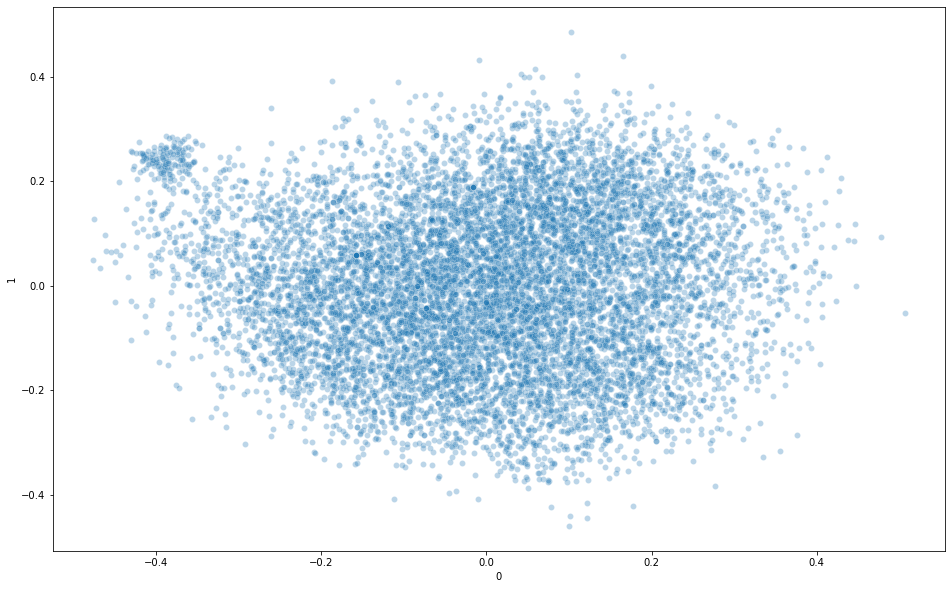

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=0, y=1,
#     x = df[0],
#     y = df[1],
#     hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

/tmp/ipykernel_2475033/159878698.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


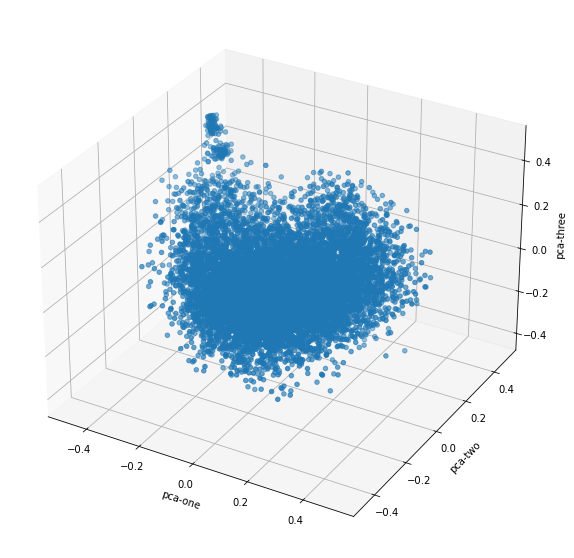

In [25]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df[0], 
    ys=df[1], 
    zs=df[2], 
#     c=df.loc[rndperm,:]["y"], 
#     cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# T-SNE

In [77]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(vec_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/wejiang/anaconda3/envs/sbert/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/wejiang/anaconda3/envs/sbert/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 3.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.323107
[t-SNE] KL divergence after 250 iterations with early exaggeration: 94.187668
[t-SNE] KL divergence after 300 iterations: 4.203411
t-SNE done! Time elapsed:

In [81]:
print(tsne_results.shape)
print(tsne_results[:10])

(10000, 2)
[[-0.85728407  3.5520825 ]
 [-1.065838    3.437655  ]
 [-0.96708894  3.8025258 ]
 [-0.9801733   1.4075426 ]
 [-1.2657685   4.6330957 ]
 [ 0.00720767  0.694342  ]
 [-1.0007545   2.9303374 ]
 [-2.9158547   6.0951977 ]
 [-0.5299076   1.2721804 ]
 [-2.8121123   5.750279  ]]


<AxesSubplot:>

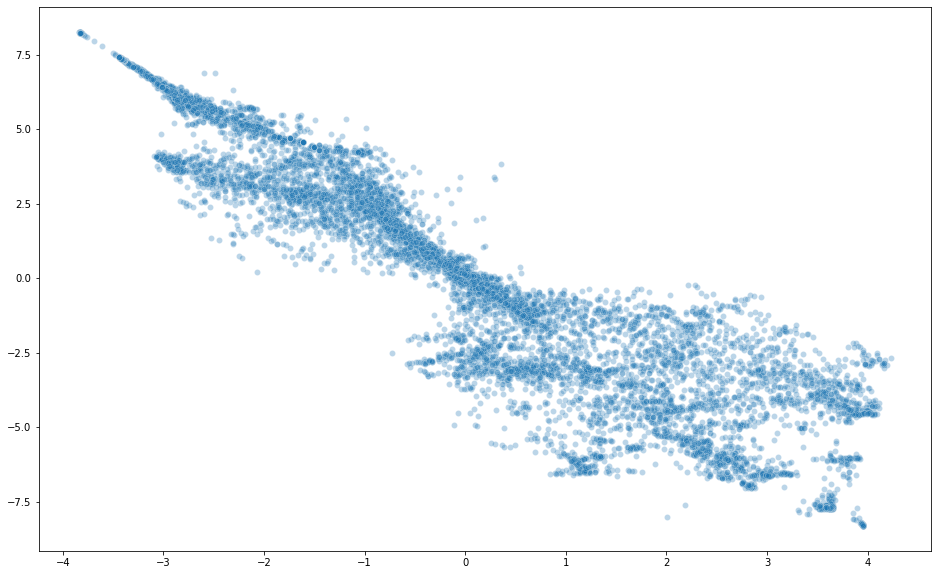

In [80]:
tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_2d_one, 
    y=tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)

## Color T-SNE in clusters

Object: sentences with KEYWORD A should be in different colors with sentences with KEYWORD B.

So A and B should be of the same category but opposite?

In [56]:
with open('../data/plain_c4/realnewslike/c4-train.00000-of-00512.txt') as f:
    sentences = f.readlines()
    sentences_subset = [sentences[i].replace('\n', '') for i in range(10000)]
print(sentences_subset[:10])

['After the martyrdom of St. Boniface, Vergilius was made Bishop of Salzburg (766 or 767) and laboured successfully for the upbuilding of his diocese as well as for the spread of the Faith in neighbouring heathen countries, especially in Carinthia.', 'He died at Salzburg, 27 November, 789.', 'In 1233 he was canonized by Gregory IX.', 'His doctrine that the earth is a sphere was derived from the teaching of ancient geographers, and his belief in the existence of the antipodes was probably influenced by the accounts which the ancient Irish voyagers gave of their journeys.', 'This, at least, is the opinion of Rettberg ("Kirchengesch.', 'Deutschlands", II, 236).', '"Whoever gets him, they\'ll be getting a good one," David Montgomery said.', 'INDIANAPOLIS — Hakeem Butler has been surrounded by some of the best wide receivers on the planet this week at the NFL Scouting Combine.', 'It’s an experience that might humble some.', 'But for Butler, it has only enhanced his confidence.']


In [61]:
sentences_subset_words_unflatten = [s.split() for s in sentences_subset]
sentences_subset_words = [item for sublist in sentences_subset_words_unflatten for item in sublist]
sentences_subset_words[:20]

['After',
 'the',
 'martyrdom',
 'of',
 'St.',
 'Boniface,',
 'Vergilius',
 'was',
 'made',
 'Bishop',
 'of',
 'Salzburg',
 '(766',
 'or',
 '767)',
 'and',
 'laboured',
 'successfully',
 'for',
 'the']

In [63]:
from collections import Counter

Counter = Counter(sentences_subset_words)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(500)
  
print(most_occur)

[('the', 10480), ('to', 5498), ('and', 5220), ('of', 5047), ('a', 4311), ('in', 3842), ('for', 1954), ('that', 1916), ('is', 1795), ('on', 1757), ('The', 1467), ('with', 1466), ('was', 1149), ('at', 1109), ('as', 1095), ('be', 1029), ('are', 950), ('from', 881), ('it', 845), ('by', 841), ('have', 839), ('will', 796), ('has', 737), ('an', 709), ('his', 693), ('not', 631), ('he', 628), ('this', 616), ('or', 595), ('their', 564), ('they', 553), ('I', 530), ('said', 514), ('but', 512), ('more', 499), ('who', 484), ('PM', 480), ('you', 476), ('been', 430), ('which', 428), ('about', 426), ('its', 426), ('were', 405), ('would', 405), ('had', 397), ('one', 381), ('than', 379), ('all', 359), ('can', 359), ('also', 348), ('up', 332), ('we', 332), ('out', 313), ('when', 302), ('after', 301), ('her', 295), ('In', 290), ('over', 285), ('new', 279), ('other', 279), ('said.', 269), ('people', 255), ('two', 252), ('what', 251), ('could', 249), ('into', 248), ('some', 247), ('first', 245), ('so', 245),

In [69]:
print('Tesla' in sentences_subset_words)
print('Ford' in sentences_subset_words)
print('Mercedes' in sentences_subset_words)
print('Audi' in sentences_subset_words)
print('BMW' in sentences_subset_words)

True
True
False
False
False


In [70]:
for s in sentences_subset:
    if 'Tesla' in s or 'Ford' in s:
        print(s)

1) It's still an adventure to take an electric-vehicle road trip (unless you're driving a Tesla using the company's Supercharger network).
6) A couple of RV parks have claimed that they needed to replace receptacles to their 50-Amp hookup after a Tesla used it.
7) When I learn a Tesla has stopped at an RV park, the park operators will often ask me for $10 or more to recharge (my bike uses maybe $0.60 of electricity).
My motorcycle battery holds one-tenth the energy of a Tesla battery, so the cost for electricity is a factor of 10 less--but I often have to explain that slowly and carefully.
Taken with Mark Hamill’s recent comments to Entertainment Tonight that Lucasfilm wants him, Fisher, and Ford back for a new trilogy of movies, this news makes it seem more and more likely that we might be able to see a Wishful Drinking Leia yet.
A president might choose to grant a pardon before prosecution of a person when the president believes that the prosecution is not in the national interest; P

In [112]:
def construct_colored_plot(tsne_2d_one, tsne_2d_two, keywords_list=['US', 'Ameraica', 'India', 'China']):

    # extract the vector IDs that contain the keywords
    
    ID_list = [] # nested ID list
    for i in range(len(keywords_list)):
        ID_list.append([])
    
    for i, s in enumerate(sentences_subset):
        for j, keyword in enumerate(keywords_list):
            if keyword in s:
                ID_list[j].append(i)
    
    all_idx = np.arange(len(tsne_2d_one))
    
    idx_with_keywords = dict()
    for sub_list in ID_list:
        for e in sub_list:
            idx_with_keywords[e] = True
            
    idx_without_keywords = []
    for i in range(len(tsne_2d_one)):
        if i not in idx_with_keywords:
            idx_without_keywords.append(i)
    
#     fig, ax=plt.subplots()
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    ax.scatter(
        x=tsne_2d_one[idx_without_keywords], 
        y=tsne_2d_two[idx_without_keywords],
        alpha=0.1,
#         color='green'
        color='#D5E8D4'
    )
    
    axes = []
    for i in range(len(keywords_list)):
        axes.append(ax.scatter(
            x=tsne_2d_one[ID_list[i]], 
            y=tsne_2d_two[ID_list[i]],
            alpha=0.7
        ))
        
    ax.legend(axes , keywords_list, loc='upper right')

### Some interesting pairs:

he vs she vs I vs you

US vs America vs India vs China

Technology vs Research vs University vs Google

military vs Police

### How to interpret?

For a word, are the embeddings are close to each other (for technical words)? Or the scattered everywhere (for universal words like 'you' and 'me')?

For words with similar meanings, are the embeddings close to each other?

For words with contradictory meanings, are the embeddings far away from each other?

### Conclusion

Using keywords based visualization may not be ideal because those words can appear in many sceneraios in which the sentence embeddings are completely different

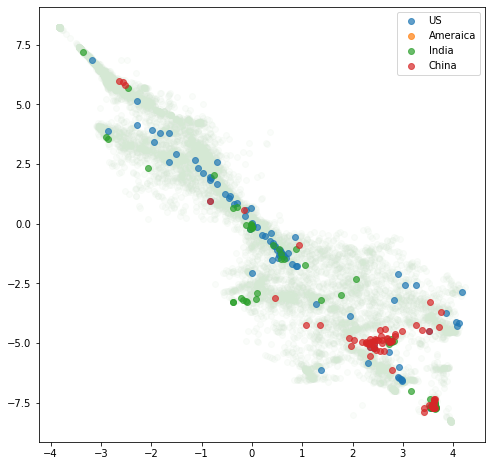

In [113]:
construct_colored_plot(tsne_2d_one, tsne_2d_two, keywords_list=['US', 'Ameraica', 'India', 'China'])

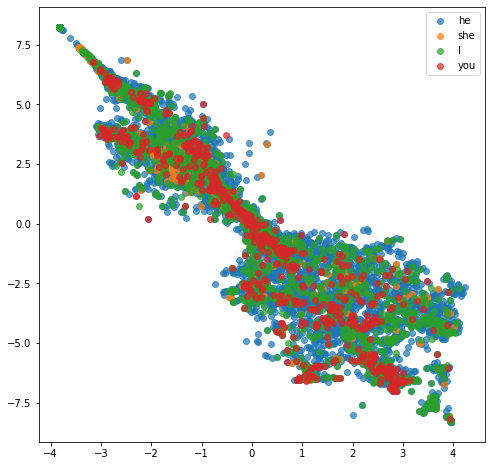

In [114]:
construct_colored_plot(tsne_2d_one, tsne_2d_two, keywords_list=['he', 'she', 'I', 'you'])

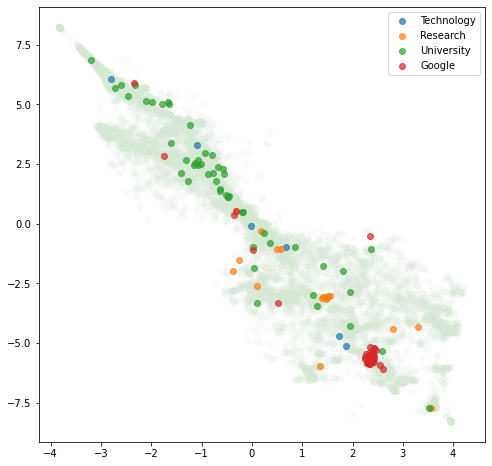

In [115]:
construct_colored_plot(tsne_2d_one, tsne_2d_two, keywords_list=['Technology', 'Research', 'University', 'Google'])

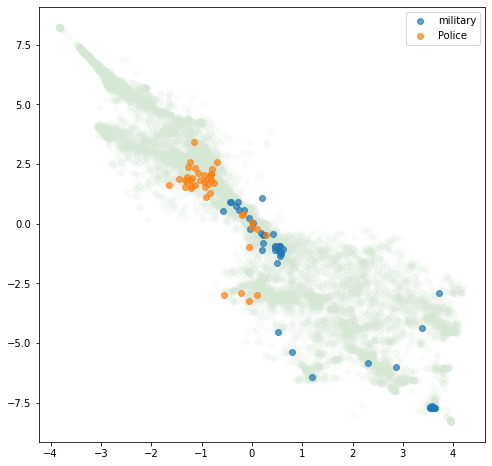

In [116]:
# military vs Police
construct_colored_plot(tsne_2d_one, tsne_2d_two, keywords_list=['military', 'Police'])

# PCA + T-SNE

In [28]:
pca_dim = 150
pca = PCA(n_components=pca_dim)
pca_result = pca.fit_transform(vec_subset)
print('Explained variation per principal component (first 10 dim): {}'.format(pca.explained_variance_ratio_[:10]))
print('Total variation of the {} dim: {}'.format(pca_dim, np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component (first 10 dim): [0.02995105 0.0246657  0.02237932 0.01853865 0.01634407 0.01593784
 0.01483308 0.01423989 0.01341004 0.01254227]
Total variation of the 150 dim: 0.8010783195495605


In [30]:
time_start = time.time()
pca_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
pca_tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/wejiang/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wejiang/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 2.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.287948
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.755722
[t-SNE] KL divergence after 300 iterations: 3.692316
t-SNE done! Time elapsed:

<AxesSubplot:>

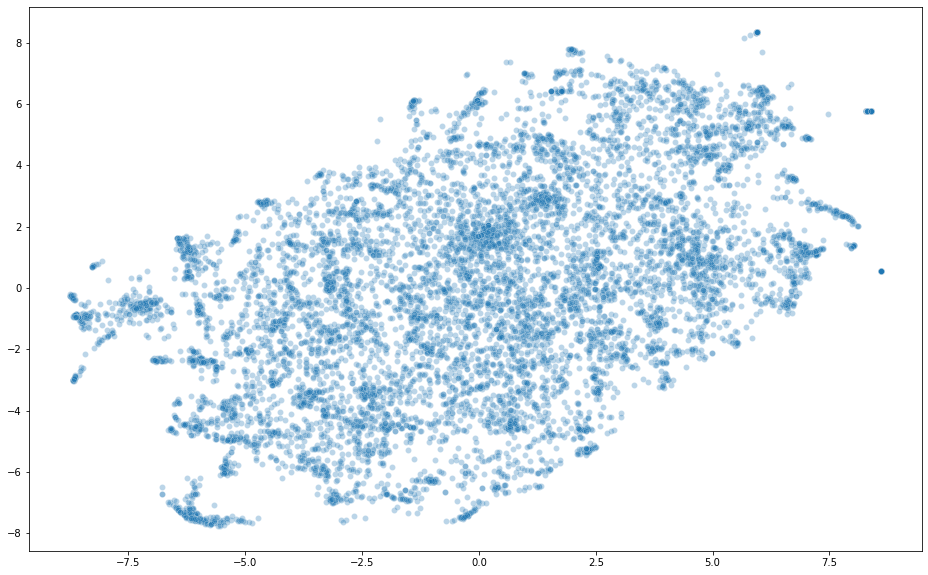

In [31]:
pca_tsne_2d_one = pca_tsne_results[:,0]
pca_tsne_2d_two = pca_tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_tsne_2d_one, 
    y=pca_tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)

# Spherical coordinates

Wiki (n-dimensional): https://en.wikipedia.org/wiki/N-sphere#Spherical_coordinates

Wiki (3-dimensional): https://en.wikipedia.org/wiki/Spherical_coordinate_system


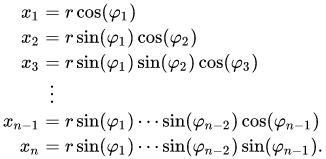

In [115]:
def get_phis(x):
    """
    return the polar coordinate angles given input vector x 
    x has a radius ~= 1
    x is a one dimensional vector
    """
    assert np.allclose(np.sum(np.square(x)), 1), \
        "The vector does not have a radius close to 1"
    dim = x.shape[0]
    n_phi = dim - 1
    phis = np.zeros(n_phi)
    
    assert dim >= 2, "the polar coordinate only works for high-dim data"
    
    for i in range(n_phi):
        if i == 0:
            accumulated_sin_prod = 1
        else:
            accumulated_sin_prod *= np.sin(phis[i - 1])
        phis[i] = np.arccos(x[i] / accumulated_sin_prod)
        
    # reproduced vector
    x_reprod = np.zeros(dim)
    for i in range(n_phi):
        if i == 0:
            accumulated_sin_prod = 1
        else:
            accumulated_sin_prod *= np.sin(phis[i - 1])
        x_reprod[i] = accumulated_sin_prod * np.cos(phis[i])
    x_reprod[n_phi] = accumulated_sin_prod * np.sin(phis[n_phi - 1])
#     print("x: ", x)
#     print("x_reprod: ", x_reprod)
#     assert np.allclose(np.sum(np.square(x_reprod)), 1, rtol=1e-03, atol=1e-03), \
#         "The reconstructed vector does not have a radius close to 1"
#     assert np.allclose(x, x_reprod, rtol=1e-02, atol=1e-03), \
#         "The reconstructed x using phis are not consistent to the original vec"
        
    return phis

def get_phis_batch(x_batch):
    """
    
    """
    num_vecs, dim = x_batch.shape
    phis = np.zeros((num_vecs, dim - 1))
    for i in range(num_vecs):
        phis[i,:] = get_phis(x_batch[i])
        
    return phis

In [116]:
get_phis(vec[0])

array([1.540323  , 1.48363765, 1.66260958, 1.56513778, 1.60931494,
       1.51813282, 1.6261883 , 1.53171087, 1.57455884, 1.62651052,
       1.64011268, 1.60695268, 1.59967235, 1.58891189, 1.61839857,
       1.60492468, 1.59600559, 1.46743489, 1.58667506, 1.6060448 ,
       1.64857383, 1.54911892, 1.57527458, 1.57640068, 1.52324144,
       1.60334405, 1.60296004, 1.50944869, 1.48497382, 1.57300871,
       1.54617073, 1.6891347 , 1.56008705, 1.64718521, 1.57602289,
       1.54174075, 1.56373025, 1.50321916, 1.64489048, 1.53426297,
       1.48461038, 1.46485765, 1.63617617, 1.58302246, 1.5926899 ,
       1.60115626, 1.5274784 , 1.51488757, 1.63271119, 1.57075618,
       1.57634572, 1.63359215, 1.54820189, 1.61053811, 1.71962324,
       1.55011177, 1.61588915, 1.58586166, 1.55330223, 1.58391559,
       1.55221085, 1.47963836, 1.55662616, 1.53524227, 1.63921328,
       1.57388005, 1.56224228, 1.54466296, 1.57418213, 1.50430728,
       1.4255819 , 1.67925212, 1.60058883, 1.59829553, 1.67097

In [117]:
phis_vec_subset = get_phis_batch(vec_subset[:1000])

/tmp/ipykernel_2475033/503074436.py:20: RuntimeWarning: invalid value encountered in arccos
  phis[i] = np.arccos(x[i] / accumulated_sin_prod)


Dimension 0


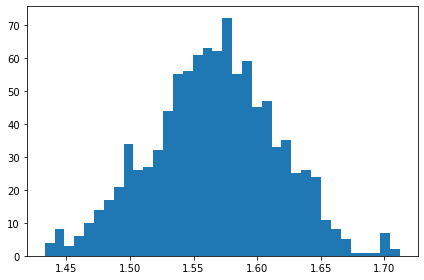

Dimension 1


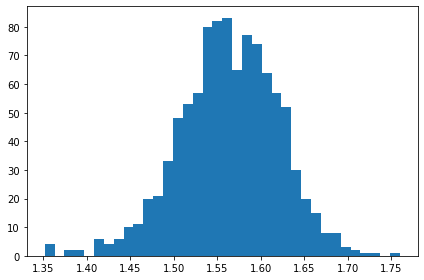

Dimension 2


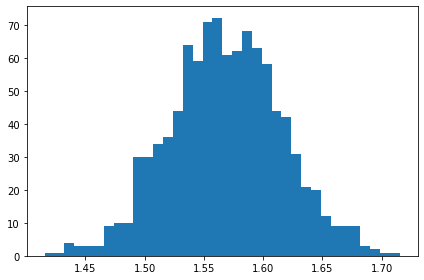

Dimension 3


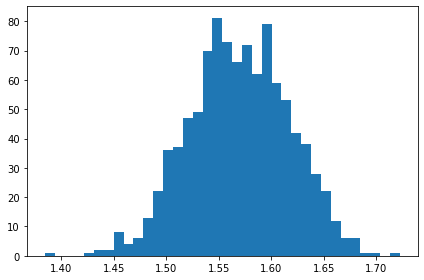

Dimension 4


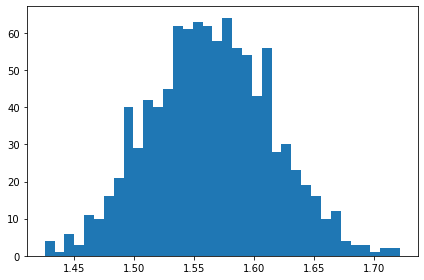

Dimension 5


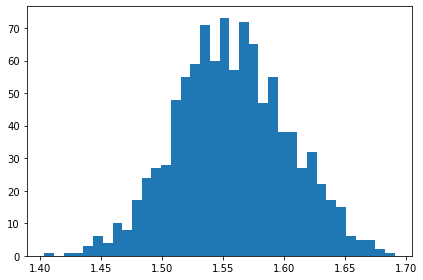

Dimension 6


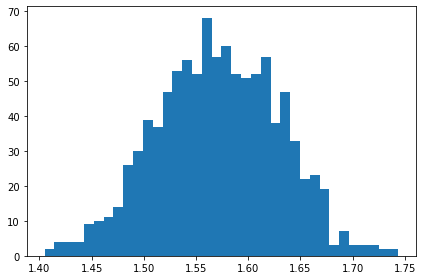

Dimension 7


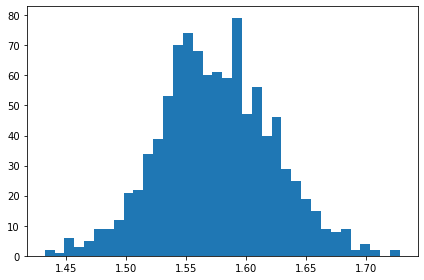

Dimension 8


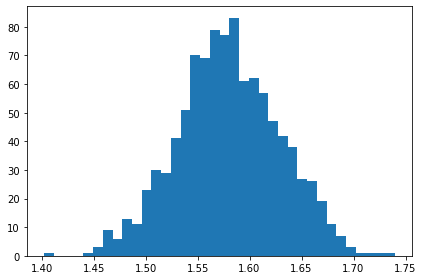

Dimension 9


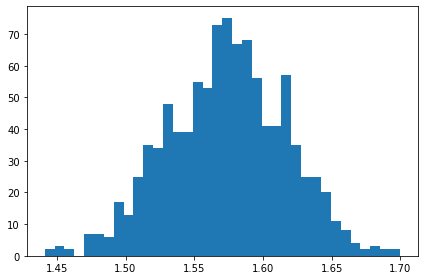

In [118]:
show_phi_num = 10
n_bins = 36#365


# fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# print("Dimension", 0)
# axs.hist(phis_vec_subset[:, 0], bins=n_bins)
# plt.show()
    
for i in range(show_phi_num):
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    print("Dimension", i)
    axs.hist(phis_vec_subset[:, i], bins=n_bins)
    plt.show()

# Visualize STS

http://ixa2.si.ehu.eus/stswiki/index.php/Main_Page

I used the news headline subset of STS 2015 evaluation set:

https://aclanthology.org/S15-2045.pdf

https://alt.qcri.org/semeval2015/task2/

In [161]:
# from nltk.tokenize import sent_tokenize

In [2]:
fname_input = '../data/STS/test_evaluation_task2a/STS.input.headlines.txt'
fname_score = '../data/STS/test_evaluation_task2a/STS.gs.headlines.txt'


with open(fname_input) as f:
    lines_input = f.readlines()
with open(fname_score) as f:
    lines_score = f.readlines()

assert len(lines_input) == len(lines_score)

In [3]:
# Filtering & Cleaning

effective_scores = [] # numeric scores
effective_sentence_pairs = [] # pair of sentences
for i in range(len(lines_score)):
    # there are some empty lines
    lines_score[i] = lines_score[i].replace('\n', '')
    if lines_score[i] != '':
        effective_scores.append(float(lines_score[i]))
#         sentence_pair = sent_tokenize(lines_input[i])
        sentence_pair = lines_input[i].replace('\n', '').split('\t')
        effective_sentence_pairs.append(sentence_pair)
        
print("Effective pairs: {}".format(len(effective_scores)))
print("First 10 samples")
for i in range(10):
    print(effective_scores[i], effective_sentence_pairs[i])

Effective pairs: 750
First 10 samples
1.3 ["The foundations of South Africa are built on Nelson Mandela's memory", "Australian politicians lament over Nelson Mandela's death"]
3.0 ['Turkish riot police tear gas Taksim Square protest', 'Turkish riot police enter Taksim Square']
5.0 ['Chicago Shooting Shows Gap in Stepped-up Policing', 'Chicago shooting shows gap in stepped-up policing']
0.0 ['Feds move to require car-to-car safety communication', "Guatemala overturns former dictator's genocide conviction"]
1.2 ['Ukraine protest leaders name ministers, Russian troops on alert', "Ukraine Refuses to Act Against Russian 'Provocation'"]
1.2 ['North Korea shuns offer of talks', 'North Korea shoots 2 rockets']
5.0 ["Prince Charles 'compares Putin to Hitler'", "Prince Charles 'compares Vladimir Putin to Adolf Hitler'"]
3.6 ['Malala, Snowden, Belarusians Short-Listed For Sakharov Prize', 'Fugitive Snowden short-listed for European rights prize']
0.0 ['Iran warns against military intervention in 

In [4]:
print("Samples of max relevance (5):")
for i, score in enumerate(effective_scores):
    if score == 5:
        print("sentence pair ID: ", i, effective_sentence_pairs[i])

Samples of max relevance (5):
sentence pair ID:  2 ['Chicago Shooting Shows Gap in Stepped-up Policing', 'Chicago shooting shows gap in stepped-up policing']
sentence pair ID:  6 ["Prince Charles 'compares Putin to Hitler'", "Prince Charles 'compares Vladimir Putin to Adolf Hitler'"]
sentence pair ID:  25 ['Snowden Hits Hurdles in Search for Asylum', "Snowden's hits hurdles in search for asylum"]
sentence pair ID:  30 ['Matt Smith quits BBC‚Äôs Doctor Who', "Matt Smith quits BBC's Doctor Who"]
sentence pair ID:  42 ['Nobel author Doris Lessing dies at 94', 'Nobel laureate Doris Lessing dies at 94']
sentence pair ID:  55 ['Turkish search ends as last missing miners found', 'Turkish Search Ends as Last Missing Miners Found']
sentence pair ID:  59 ['Ankeet Chavan granted conditional bail for marriage', 'Ankeet Chavan granted bail to get married']
sentence pair ID:  76 ['Greek far-right leader imprisoned pending trial', 'Greek Far-Right Leader Imprisoned Pending Trial']
sentence pair ID:  

In [5]:
print("Samples of min relevance (0):")
for i, score in enumerate(effective_scores):
    if score == 0:
        print("sentence pair ID: ", i, effective_sentence_pairs[i])

Samples of min relevance (0):
sentence pair ID:  3 ['Feds move to require car-to-car safety communication', "Guatemala overturns former dictator's genocide conviction"]
sentence pair ID:  8 ['Iran warns against military intervention in Iraq', 'Explosion near Damascus military airport']
sentence pair ID:  43 ["Japan's opposition party chief criticizes Abe's economic policies", 'Zimbabwe‚Äôs opposition MDC party challenges Robert Mugabe‚Äôs election win']
sentence pair ID:  64 ['Cuba sees "major role" for foreign investment', 'House set to vote on plan to reopen government']
sentence pair ID:  70 ["Cameron 'has no concerns' over halal meat", 'Veterans health probe confirms cover-up of care delays']
sentence pair ID:  74 ['GM slow on recalls, Congress record shows', 'mobile world congress future smartphone']
sentence pair ID:  112 ['Storm buries Northeast; 16 inches of snow in NJ', 'Forum urges stable relations for China, Japan']
sentence pair ID:  151 ["France cleared to impose controver

In [6]:
print("Samples of medium relevance (3):")
for i, score in enumerate(effective_scores):
    if 2.5 <= score and score <= 3.5:
        print("sentence pair ID: ", i, effective_sentence_pairs[i])

Samples of medium relevance (3):
sentence pair ID:  1 ['Turkish riot police tear gas Taksim Square protest', 'Turkish riot police enter Taksim Square']
sentence pair ID:  10 ['One dead in Philadelphia building collapse, others pulled from rubble', 'Six confirmed dead after Philadelphia building collapse']
sentence pair ID:  11 ['Police clash with youth in Cairo after anti-Morsi protest', 'Egypt: Police clash with pro-Morsi protesters']
sentence pair ID:  18 ['Army jets kill 38 militants in NW Pakistan air raids', 'U.S. drone kills 4 militants in Pakistan']
sentence pair ID:  20 ['ElBaradei to Become Egyptian PM', 'Liberal ElBaradei named Egypt PM, Islamists cry foul']
sentence pair ID:  26 ['Death toll in building collapse in south India mounts to 47', '4 killed in building collapse in southern India']
sentence pair ID:  36 ['Gunmen Kill Eight In Second Kenya Attack', "Gunmen 'Kill 15' In Second Kenya Attack"]
sentence pair ID:  39 ['Iraqi Bomb Attacks Kill At Least 13', 'Iraqi Car Bom

In [7]:
from sentence_transformers import SentenceTransformer
#model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('/home/wejiang/.cache/torch/sentence_transformers/sentence-transformers_all-MiniLM-L6-v2')

In [9]:
# mapping from effective_sentence_pairs -> effective_sentence_pairs_flatten = ID -> (ID * 2, ID * 2 + 1)
effective_sentence_pairs_flatten = [item for sublist in effective_sentence_pairs for item in sublist]
effective_sentence_pairs_flatten[:10]

["The foundations of South Africa are built on Nelson Mandela's memory",
 "Australian politicians lament over Nelson Mandela's death",
 'Turkish riot police tear gas Taksim Square protest',
 'Turkish riot police enter Taksim Square',
 'Chicago Shooting Shows Gap in Stepped-up Policing',
 'Chicago shooting shows gap in stepped-up policing',
 'Feds move to require car-to-car safety communication',
 "Guatemala overturns former dictator's genocide conviction",
 'Ukraine protest leaders name ministers, Russian troops on alert',
 "Ukraine Refuses to Act Against Russian 'Provocation'"]

In [10]:
sentence_embeddings = model.encode(effective_sentence_pairs_flatten)

In [11]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(sentence_embeddings)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/home/wejiang/anaconda3/envs/sbert/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/wejiang/anaconda3/envs/sbert/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.002s...
[t-SNE] Computed neighbors for 1500 samples in 0.316s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.416840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.238846
[t-SNE] KL divergence after 300 iterations: 1.492911
t-SNE done! Time elapsed: 3.6727566719055176 seconds


In [14]:
print(tsne_results.shape)
print(tsne_results)

(1500, 2)
[[  3.1498     -14.50604   ]
 [  2.4663384  -13.947412  ]
 [ -0.23056166  -7.7052574 ]
 ...
 [  9.20473     -6.018313  ]
 [ -3.7799044   11.560368  ]
 [ -3.9482782   11.054021  ]]


<AxesSubplot:>

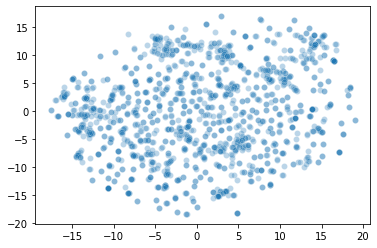

In [15]:
tsne_2d_one = tsne_results[:,0]
tsne_2d_two = tsne_results[:,1]

fig,ax=plt.subplots()

sns.scatterplot(
    x=tsne_2d_one, 
    y=tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)

Text(20, 2.5, 'Saudi Arabia to grant Lebanese army $3 billion')

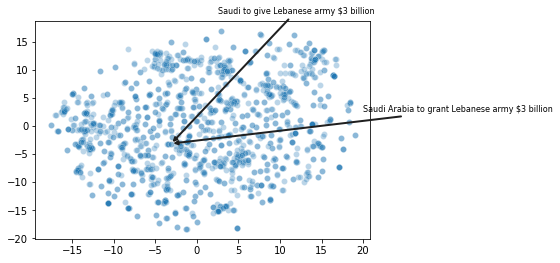

In [31]:
"""
High Similarity Example:

sentence pair ID:  125 ['Saudi to give Lebanese army $3 billion', 'Saudi Arabia to grant Lebanese army $3 billion']
sentence pair ID:  183 ['BlackBerry loses US$965m in Q2', 'BlackBerry loses $965M in 2nd quarter']
"""


fig, ax=plt.subplots()

# plt.scatter(x=tsne_2d_one, y=tsne_2d_two)

sns.scatterplot(
    x=tsne_2d_one, 
    y=tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)
sentence_pair_ID = 125
ax.annotate(effective_sentence_pairs_flatten[sentence_pair_ID * 2], 
                 xy=(tsne_results[sentence_pair_ID * 2][0], tsne_results[sentence_pair_ID * 2][0]), 
                 xytext=(2.5, 20), arrowprops={"arrowstyle": '-|>', 'color': '#1f1f1f', 'linewidth': 2}, fontsize=8)
ax.annotate(effective_sentence_pairs_flatten[sentence_pair_ID * 2 + 1], 
                 xy=(tsne_results[sentence_pair_ID * 2 + 1][0], tsne_results[sentence_pair_ID * 2 + 1][0]), 
                 xytext=(20, 2.5), arrowprops={"arrowstyle": '-|>', 'color': '#1f1f1f', 'linewidth': 2}, fontsize=8)

Text(20, 2.5, 'Forum urges stable relations for China, Japan')

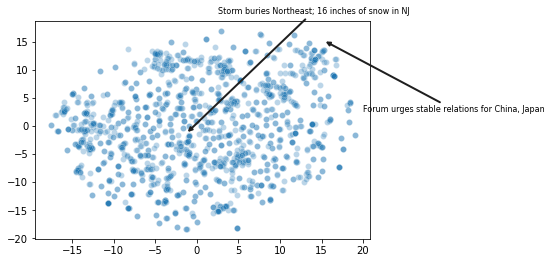

In [45]:
"""
Low Similarity Example:

sentence pair ID:  3 ['Feds move to require car-to-car safety communication', "Guatemala overturns former dictator's genocide conviction"]
sentence pair ID:  8 ['Iran warns against military intervention in Iraq', 'Explosion near Damascus military airport']
sentence pair ID:  43 ["Japan's opposition party chief criticizes Abe's economic policies", 'Zimbabwe‚Äôs opposition MDC party challenges Robert Mugabe‚Äôs election win']
sentence pair ID:  64 ['Cuba sees "major role" for foreign investment', 'House set to vote on plan to reopen government']
sentence pair ID:  70 ["Cameron 'has no concerns' over halal meat", 'Veterans health probe confirms cover-up of care delays']
sentence pair ID:  74 ['GM slow on recalls, Congress record shows', 'mobile world congress future smartphone']
sentence pair ID:  112 ['Storm buries Northeast; 16 inches of snow in NJ', 'Forum urges stable relations for China, Japan']
sentence pair ID:  151 ["France cleared to impose controversial 'millionaire tax'", 'Manila to increase counter-terror team']
"""



fig, ax=plt.subplots()

# plt.scatter(x=tsne_2d_one, y=tsne_2d_two)

sns.scatterplot(
    x=tsne_2d_one, 
    y=tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)
sentence_pair_ID = 112
ax.annotate(effective_sentence_pairs_flatten[sentence_pair_ID * 2], 
                 xy=(tsne_results[sentence_pair_ID * 2][0], tsne_results[sentence_pair_ID * 2][0]), 
                 xytext=(2.5, 20), arrowprops={"arrowstyle": '-|>', 'color': '#1f1f1f', 'linewidth': 2}, fontsize=8)
ax.annotate(effective_sentence_pairs_flatten[sentence_pair_ID * 2 + 1], 
                 xy=(tsne_results[sentence_pair_ID * 2 + 1][0], tsne_results[sentence_pair_ID * 2 + 1][0]), 
                 xytext=(20, 2.5), arrowprops={"arrowstyle": '-|>', 'color': '#1f1f1f', 'linewidth': 2}, fontsize=8)

Text(20, 2.5, '4 killed in building collapse in southern India')

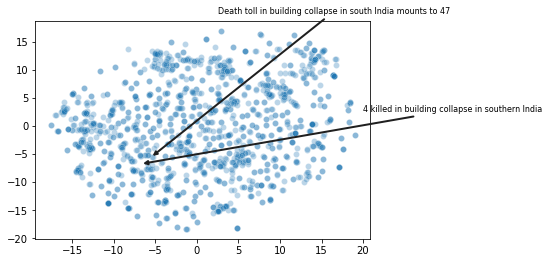

In [51]:
"""
Medium Similarity Example:

sentence pair ID:  1 ['Turkish riot police tear gas Taksim Square protest', 'Turkish riot police enter Taksim Square']
sentence pair ID:  10 ['One dead in Philadelphia building collapse, others pulled from rubble', 'Six confirmed dead after Philadelphia building collapse']
sentence pair ID:  11 ['Police clash with youth in Cairo after anti-Morsi protest', 'Egypt: Police clash with pro-Morsi protesters']
sentence pair ID:  18 ['Army jets kill 38 militants in NW Pakistan air raids', 'U.S. drone kills 4 militants in Pakistan']
sentence pair ID:  20 ['ElBaradei to Become Egyptian PM', 'Liberal ElBaradei named Egypt PM, Islamists cry foul']
sentence pair ID:  26 ['Death toll in building collapse in south India mounts to 47', '4 killed in building collapse in southern India']
sentence pair ID:  36 ['Gunmen Kill Eight In Second Kenya Attack', "Gunmen 'Kill 15' In Second Kenya Attack"]
sentence pair ID:  39 ['Iraqi Bomb Attacks Kill At Least 13', 'Iraqi Car Bomb Near Church Kills At Least 14']
"""



fig, ax=plt.subplots()

# plt.scatter(x=tsne_2d_one, y=tsne_2d_two)

sns.scatterplot(
    x=tsne_2d_one, 
    y=tsne_2d_two,
#     hue="y",
    palette=sns.color_palette("hls", 10),
#     data=df_subset,
    legend="full",
    alpha=0.3
)
sentence_pair_ID = 26
ax.annotate(effective_sentence_pairs_flatten[sentence_pair_ID * 2], 
                 xy=(tsne_results[sentence_pair_ID * 2][0], tsne_results[sentence_pair_ID * 2][0]), 
                 xytext=(2.5, 20), arrowprops={"arrowstyle": '-|>', 'color': '#1f1f1f', 'linewidth': 2}, fontsize=8)
ax.annotate(effective_sentence_pairs_flatten[sentence_pair_ID * 2 + 1], 
                 xy=(tsne_results[sentence_pair_ID * 2 + 1][0], tsne_results[sentence_pair_ID * 2 + 1][0]), 
                 xytext=(20, 2.5), arrowprops={"arrowstyle": '-|>', 'color': '#1f1f1f', 'linewidth': 2}, fontsize=8)